Box-cox

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

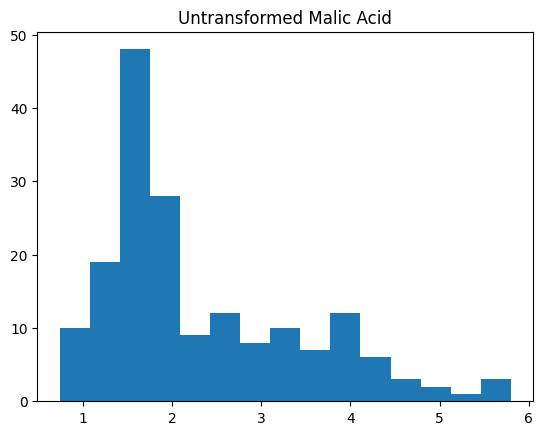

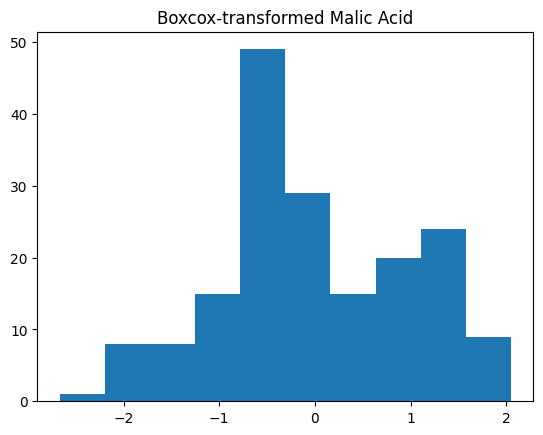


 transformed Malic Acid has mean=1.197543936674326e-16 and standard deviation=1.0028208800748637


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

# load dataset -----------------------
X = pd.DataFrame(datasets.load_wine().data)
X.columns = datasets.load_wine().feature_names
print(X.head(5))

y = datasets.load_wine().target_names
plt.hist(X.malic_acid, bins=15)
plt.title('Untransformed Malic Acid')
plt.show()

# perform transform -----------------------
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer (choose which transform)
pow_trans = PowerTransformer(method="box-cox")
# pow_trans = PowerTransformer(method="yeo-johnson")                    # use yeo-johnson if data has negative values

column_to_transform = X[['malic_acid']]                                 # column_to_transform is the target. Need [[ ]] to prevent error
pow_trans.fit(column_to_transform)                                      # Train the transform on the data
X['malic_acid_bc_transform'] = pow_trans.transform(column_to_transform) # Apply the power transform to the data

plt.hist(X['malic_acid_bc_transform'])
plt.title('Boxcox-transformed Malic Acid')
plt.show()

print(f"\n transformed Malic Acid has mean={X['malic_acid_bc_transform'].mean()} and standard deviation={X['malic_acid_bc_transform'].std()}")

StandardScaler

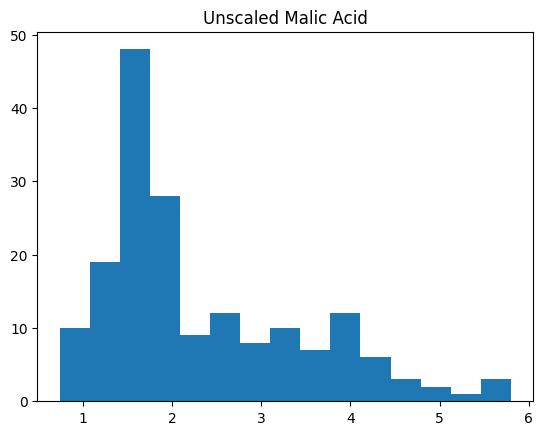

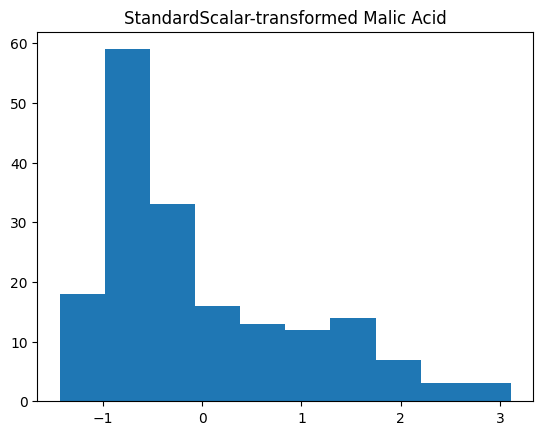


 transformed Malic Acid has mean=-1.197543936674326e-16 and standard deviation=1.002820880074864


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.hist(X.malic_acid, bins=15)
plt.title('Unscaled Malic Acid')
plt.show()

# perform transform -----------------------
scaler=StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X))
X_standardized.columns=X.columns
X_standardized.index=X.index


plt.hist(X_standardized['malic_acid'])
plt.title('StandardScalar-transformed Malic Acid')
plt.show()

print(f"\n transformed Malic Acid has mean={X_standardized['malic_acid'].mean()} and standard deviation={X_standardized['malic_acid'].std()}")

NN normalize layer

In [3]:
# code excerpt - this does not train the NN or make predictions

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers.experimental import preprocessing

#setup normalizer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X))

number_of_inputs= X.shape[1]

print(f"Number of inputs={number_of_inputs} \n")

nn_model = keras.Sequential([normalizer,
                          layers.Dense(10, activation='relu', input_dim=number_of_inputs),
                          layers.Dense(10, activation='relu'),
                          layers.Dense(1, activation='linear') ])

nn_model.summary()

Number of inputs=14 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 14)                29        
 on)                                                             
                                                                 
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 300 (1.18 KB)
Trainable params: 271 (1.06 KB)
Non-trainable params: 29 (120.00 Byte)
_________________________________________________________________
